Based on https://github.com/James-Jagielski/7-bit-D-A-converter-MP4-MADVLSI/blob/main/schematics/simulations/plot_dac_mc.ipynb with permission of repo owners

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from si_prefix import si_format

In [46]:
n_bits = 7
nano = 1e-9
results_dir = "./nmc"


mean endpoint diff: 9.84263261e-06
mean endpoint diff: 9.669454596225e-06
mean endpoint diff: 9.704133865149999e-06
mean endpoint diff: 9.510702513743188e-06
mean endpoint diff: 9.60912083399455e-06
mean endpoint diff: 9.692887792445458e-06
mean endpoint diff: 9.624891423176107e-06
mean endpoint diff: 9.564827829626018e-06
mean endpoint diff: 9.574803135710406e-06
mean endpoint diff: 9.601951536539364e-06
7.501524637921378e-08
[7.501524637921378e-08, 0]
max allowable error 3.750762318960689e-08
max error 8.724316322331711e-07
variance of error 8.724316322331711e-07
[0.9149312964171532, 0.09295056614942099, 0.4823900255936948, -0.282958457163655, 0.6507629978845617, -0.09456152877715973, 0.2701037268925188, -0.45006147428409704, 0.6954293312198148, -0.0023965312105377334, 0.3325172524887954, -0.31807382540071694, 0.4819447427797028, -0.1518410846994156, 0.16244715853073544, -0.44665275389268044, 0.6392779592879427, 0.040426630147370135, 0.32326020097569996, -0.22756995681806302, 0.44334

Text(0, 0.5, 'lsbs of error')

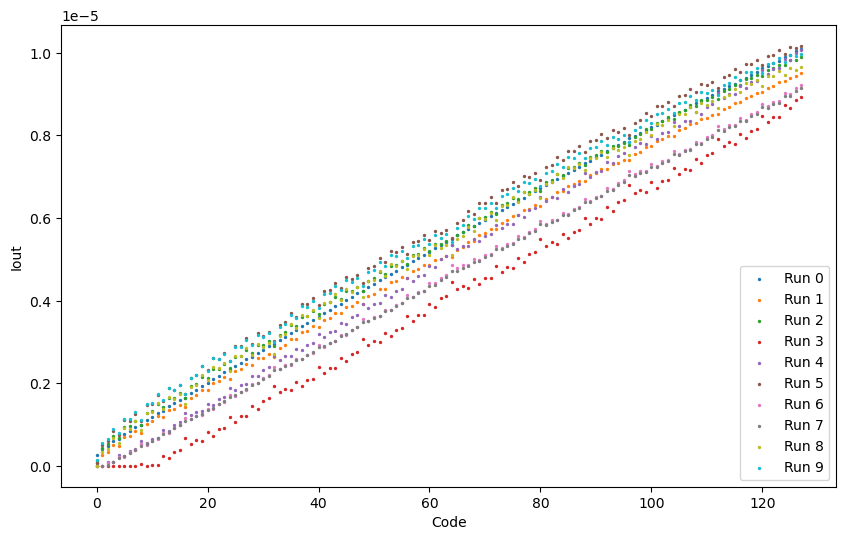

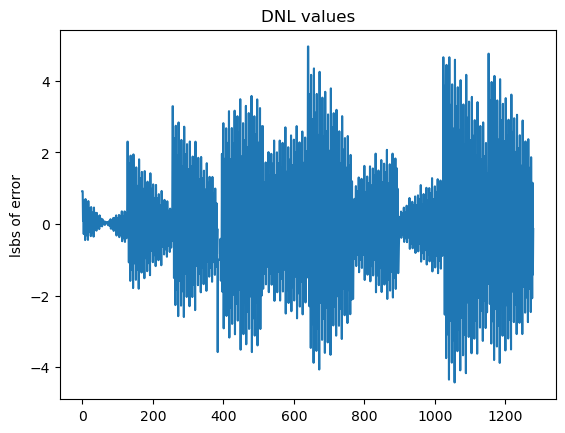

In [45]:
mc_simulations = []
endpoint_diff = []
for filename in os.listdir(results_dir):
    df = pd.read_csv(os.path.join(results_dir, filename), delimiter = "\s+")
    # print(df.head(3))
    #print(df)
    # df["code"] = df["v(b0)"] * 0 # init column to all 0s
    # for bit in range(n_bits):
    #     # df["code"] = df["code"] + (df[f"v{bit}"] > .5*df["vdd"]) * 2 ** (n_bits - bit - 1)
    #     df["code"] = df["code"] + (df[f"v(b{bit})"] > .5*1.8) * 2 ** (n_bits - bit - 1) #WHAT DOES THIS DO
    #     df.drop(f"v(b{bit})", axis = "columns", inplace = True)
    df["code"] = range(128)
    df.rename({"i(VI_out)": "Iout"}, axis = "columns", inplace = True)
    # print(df.head(10))
    mc_simulations.append(df)
    endpoint_diff.append(df["Iout"][2**n_bits - 1] - df["Iout"][0])
    print("mean endpoint diff:", np.mean(endpoint_diff))

ideal_step_size = np.mean(endpoint_diff) / (2 ** n_bits)
print(ideal_step_size)
tdf = pd.concat(mc_simulations)
plt.figure(figsize = (10, 6))
plt.xlabel("Code")
plt.ylabel("Iout")

#z = np.polyfit(tdf["code"], tdf["Iout"], 1)
z = [ideal_step_size,0]
print(z)
p = np.poly1d(z)

errors = np.subtract(p(tdf["code"]),tdf["Iout"])

print("max allowable error", np.mean( np.subtract( p(range(1,128)) ,p(range(0,127)) ) )/2 )
print("max error",np.max(errors))
print("variance of error",np.max(errors))

dnl  = []
dnl_multi = []
inl = []
for df_simulation in mc_simulations:
    sorted = df_simulation.sort_values("code")
    current =   np.subtract(np.divide(
                    np.subtract(
                         list(sorted["Iout"])[1:],list(sorted["Iout"])[:-1]
                    ),ideal_step_size),1)
    current_inl = np.sum(current)
    # print(current_inl)
    cc = list(current) #list(np.vstack((current,dnl)).T)
    #print(len(cc))
    dnl_multi.append(cc)
    inl.append(current_inl)
    dnl.append(max(current, key=abs))
    for line in cc:
        dnl.append(line)#dnl.append(float(max(line,key=abs)))
    print(cc)

# plt.plot(range(128),p(range(128)),"k--", label = "trendline", linewidth = .5)

for i, df_simulation in enumerate(mc_simulations):
    # plt.plot(np.array(df_simulation["code"]), np.array(df_simulation["Iout"]), linewidth = 1, label = f"Run {i}")
    plt.scatter(np.array(df_simulation["code"]), np.array(df_simulation["Iout"]), s = 2, label = f"Run {i}")
plt.legend(loc = "lower right")

plt.figure()
plt.plot(range(len(dnl)), dnl)
print("dnl length:",len(dnl))
plt.title("DNL values")
print("max overall dnl",max(dnl,key=abs)) 
print("loc of max value",dnl.index(max(dnl,key=abs)))
print("INL" , inl)
print("max overall inl", max(inl))
plt.ylabel("lsbs of error")

7.980901657651406e-08
[7.980901657651406e-08, 0]
max allowable error 3.990450828825703e-08
max error 9.523932064258955e-09
variance of error 9.523932064258955e-09
-3.810958476423451
5.81095847642346
max overall dnl 2.6415694498499267
loc of max value 127
INL [-3.810958476423451, 5.81095847642346]
max overall inl 5.81095847642346


Text(0, 0.5, 'lsbs of error')

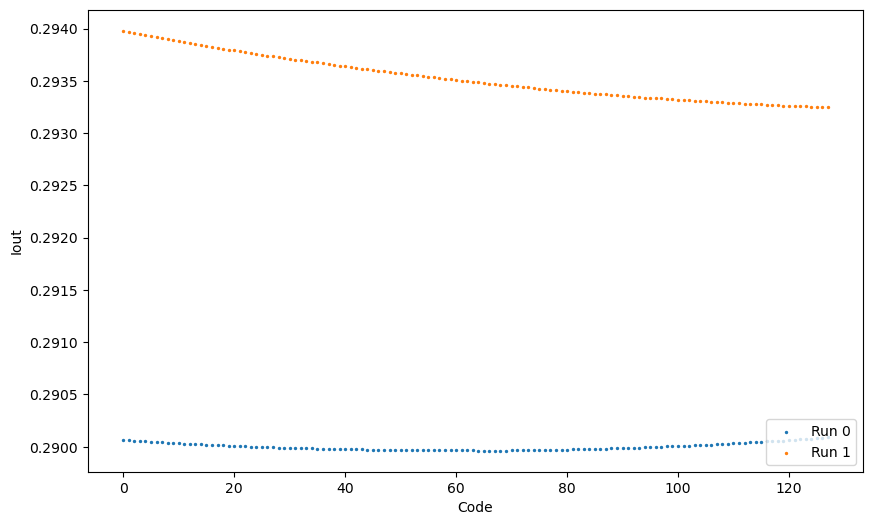

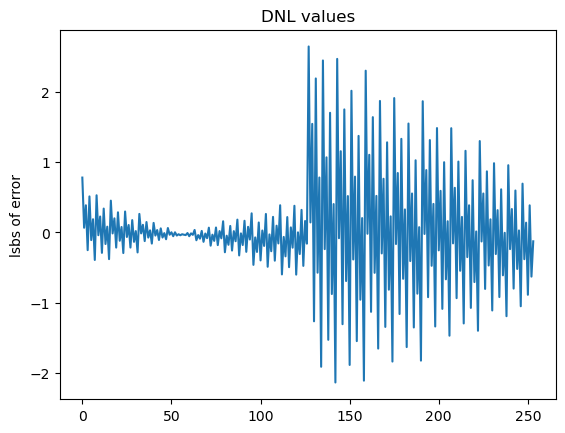

In [91]:
results_dir = "./Vin"
mc_simulations = []
endpoint_diff = []
for filename in os.listdir(results_dir):
    df = pd.read_csv(os.path.join(results_dir, filename), delimiter = "\s+")
    # print(df.head(3))
    #print(df)
    # df["code"] = df["v(b0)"] * 0 # init column to all 0s
    # for bit in range(n_bits):
    #     # df["code"] = df["code"] + (df[f"v{bit}"] > .5*df["vdd"]) * 2 ** (n_bits - bit - 1)
    #     df["code"] = df["code"] + (df[f"v(b{bit})"] > .5*1.8) * 2 ** (n_bits - bit - 1) #WHAT DOES THIS DO
    #     df.drop(f"v(b{bit})", axis = "columns", inplace = True)
    df["code"] = range(128)
    df.rename({"i(VI_out)": "Iout"}, axis = "columns", inplace = True)
    # print(df.head(10))
    mc_simulations.append(df)
    endpoint_diff.append(df["Iout"][127]-df["Iout"][0])

ideal_step_size = np.mean(endpoint_diff) / (2 ** n_bits)
print(ideal_step_size)
tdf = pd.concat(mc_simulations)
plt.figure(figsize = (10, 6))
plt.xlabel("Code")
plt.ylabel("Iout")

#z = np.polyfit(tdf["code"], tdf["Iout"], 1)
z = [ideal_step_size,0]
print(z)
p = np.poly1d(z)

errors = np.subtract(p(tdf["code"]),tdf["Iout"])

print("max allowable error", np.mean( np.subtract( p(range(1,128)) ,p(range(0,127)) ) )/2 )
print("max error",np.max(errors))
print("variance of error",np.max(errors))

dnl  = []
dnl_multi = []
inl = []
for df_simulation in mc_simulations:
    sorted = df_simulation.sort_values("code")
    current =   np.subtract(np.divide(
                    np.subtract(
                         list(sorted["Iout"])[1:],list(sorted["Iout"])[:-1]
                    ),ideal_step_size),1)
    current_inl = np.sum(current)
    print(current_inl)
    cc = list(current) #list(np.vstack((current,dnl)).T)
    #print(len(cc))
    dnl_multi.append(cc)
    inl.append(current_inl)
    for line in cc:
        dnl.append(line)#dnl.append(float(max(line,key=abs)))
    #print(dnl)

# plt.plot(range(128),p(range(128)),"k--", label = "trendline", linewidth = .5)

for i, df_simulation in enumerate(mc_simulations):
    # plt.plot(np.array(df_simulation["code"]), np.array(df_simulation["Iout"]), linewidth = 1, label = f"Run {i}")
    plt.scatter(np.array(df_simulation["code"]), np.array(df_simulation["v(Vin)"]), s = 2, label = f"Run {i}")
plt.legend(loc = "lower right")

plt.figure()
plt.plot(range(len(dnl)), dnl)
plt.title("DNL values")
print("max overall dnl",max(dnl,key=abs)) 
print("loc of max value",dnl.index(max(dnl,key=abs)))
print("INL" , inl)
print("max overall inl", max(inl))
plt.ylabel("lsbs of error")